<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [5]:
dataset = pandas.read_csv('../../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [6]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [7]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [8]:
num_cols = [col for col in dataset.columns if 'pf_identity' in col]

num_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [9]:
idataset = dataset[important_cols]
idataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [10]:
latin_idataset = idataset[idataset['region'] == 'Latin America & the Caribbean']
latin_idataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
11,2016,BRD,Barbados,Latin America & the Caribbean,NaN,10.0,10.0,10.0,0.0,0.0,0.0,NaN,5.000000,6.43,111.0,7.068447,67.0
14,2016,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,6.86,83.0,7.145432,64.0
17,2016,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.23,123.0,6.718385,92.0
20,2016,BRA,Brazil,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,5.75,144.0,6.207989,123.0
31,2016,CHL,Chile,Latin America & the Caribbean,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,5.000000,7.80,15.0,8.008018,32.0
33,2016,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.50,105.0,6.760757,87.0
36,2016,CRI,Costa Rica,Latin America & the Caribbean,0.0,5.0,10.0,7.5,10.0,10.0,10.0,10.0,6.875000,7.55,33.0,7.857714,37.0
42,2016,DOM,Dominican Rep.,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,7.18,62.0,7.061287,69.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

1. Comenzamos el pantallazo de datos simplemente obteniendo el rango de las variables:

In [20]:
dataset[num_cols].apply(lambda g: g.max() - g.min())

pf_identity_legal                 10.000000
pf_identity_parental_marriage     10.000000
pf_identity_parental_divorce      10.000000
pf_identity_parental              10.000000
pf_identity_sex_male              10.000000
pf_identity_sex_female            10.000000
pf_identity_sex                   10.000000
pf_identity_divorce               10.000000
pf_identity                       10.000000
ef_score                           6.310000
ef_rank                          161.000000
hf_score                           5.360486
hf_rank                          161.000000
dtype: float64

Adicionalmente calculamos el rango de las variables por cada region:

In [21]:
dataset.groupby('region')[num_cols].apply(lambda g: g.max() - g.min())

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
region,,,,,,,,,,,,,
Caucasus & Central Asia,7.0,5.0,5.0,5.0,10.0,10.0,10.0,5.0,5.000000,2.05,121.0,1.929752,92.0
East Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,2.93,115.0,3.243963,134.0
Eastern Europe,10.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.750000,2.53,139.0,2.602189,123.0
Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,5.000000,5.03,154.0,4.089428,142.0
Middle East & North Africa,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,3.64,146.0,4.132642,123.0
North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.48,8.0,0.532187,22.0
Oceania,0.0,5.0,5.0,5.0,10.0,0.0,5.0,0.0,5.000000,2.32,119.0,2.328483,106.0
South Asia,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,5.06,150.0,3.447529,129.0
Sub-Saharan Africa,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,3.76,153.0,3.563142,143.0


De este primer acercamiento a los datos, podemos deducir a falta de indicaciones en la fuente de los datos que las libertades personales y económicas tienen una escala de 0 a 10, siendo 10 la máxima puntuación (mejores libertades).
De los datos regionales se observa como Oriente Medio y Norte de Africa, Asia del Sur y Africa Sub-sahariana por ejemplo presentan mayor variacion en cuanto a libertades personales se refiere. Mientras que las mayores diferencias respecto a las libertades ecónomicas parecen darse en Asia del Sur y Almerica Latica y el Caribe.

2. Revisamos las medidas de localización, media, mediana y desviación estándar, entre otras, para las variables 'pf_identity' y 'hf_score' en el resto del mundo y en la región 'Latinoamérica y el caribe':

In [11]:
dataset[dataset['region'] != 'Latin America & the Caribbean'][num_cols].describe()

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,165.000000,773.000000,773.000000,1135.000000,1143.000000,1146.000000,1146.000000,501.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,6.903030,6.921087,7.302717,7.063877,6.452318,7.674520,7.068063,7.125749,7.044503,6.795881,76.711169,6.982403,77.957243
std,3.014648,4.099189,3.842961,3.864335,4.765899,4.203097,4.184468,3.784462,3.303771,0.886238,45.774646,1.090861,47.343351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.860000,1.000000,3.765827,1.000000
25%,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.210000,36.000000,6.204917,33.000000
50%,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.333333,6.900000,77.000000,6.867191,81.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.450000,117.000000,8.023044,120.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,161.000000,9.126313,162.000000


In [10]:
dataset[dataset['region'] == 'Latin America & the Caribbean'][num_cols].describe()

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,40.000000,150.000000,150.000000,223.000000,232.000000,232.000000,232.000000,84.0,232.000000,232.000000,232.000000,232.000000,232.000000
mean,3.850000,8.933333,9.333333,9.282511,7.974138,9.224138,8.599138,10.0,8.765086,6.734871,78.267241,7.047982,72.318966
std,4.817436,2.497426,2.061688,1.880677,4.027957,2.680977,2.993297,0.0,1.711732,0.870565,37.917627,0.608904,25.910134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,5.000000,2.880000,8.000000,4.200724,19.000000
25%,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,7.500000,6.422500,48.750000,6.779311,56.000000
50%,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,6.900000,78.000000,7.028045,70.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,7.285000,105.000000,7.339903,86.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,7.910000,162.000000,8.290152,161.000000


A estos descriptores de localización le sumamos el calculo de la moda en el mundo y para la región':

In [11]:
dataset[[col for col in dataset.columns if 'pf_identity' in col] + ['ef_score', 'ef_rank', 'hf_score', 'hf_rank']].mode()[:1]

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.35,48.0,3.765827,75.0


In [12]:
dataset[dataset['region'] == 'Latin America & the Caribbean'][[col for col in dataset.columns if 'pf_identity' in col] + ['ef_score', 'ef_rank', 'hf_score', 'hf_rank']].mode()[:1]

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.21,37.0,4.200724,75.0


En cuanto a si tiene sentido el cálculo de la moda. Analizando solo las varialbles principales 'pf_identity' y  'ef_score' tanto para el resto del mundo como para América Latina, tendria sentido, ya que por ejemplo para 'pf_identity' tiene una media con mayor desviación y una mediana que difiere de su media. En cuanto a las libertades económicas media y mediana por el contrario, tienen valores más próximos con menor desviación estandar. Puede ser de interez conocer el valor de la moda, esto es el valor que mas se repite en la muestra, sobre todo en cuanto libertades personales se refiere.

3. Analizamos específicamente las variables pf_identity y hf_score, en cuanto a su relación, mediante un gráfico de puntos buscando establecer si las mismas tienen correlación:

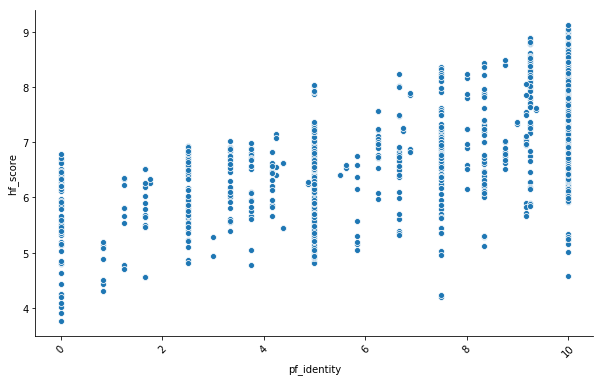

In [25]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=dataset[important_cols],
                    x='pf_identity',
                    y='hf_score')
plt.xticks(rotation=45)
seaborn.despine()

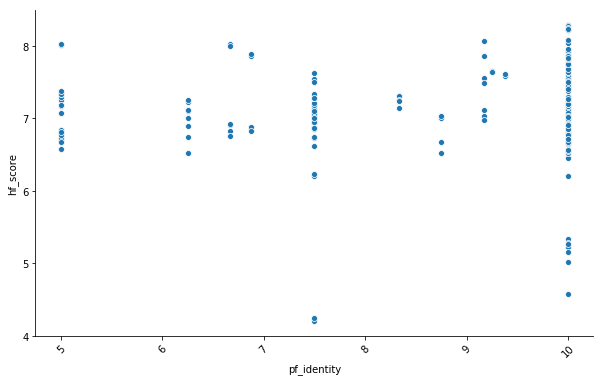

In [7]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                    x='pf_identity',
                    y='hf_score')
plt.xticks(rotation=45)
seaborn.despine()

No se observa una correlación lineal clara entre las variables libertad de indentidades y libertades humanas para 
la región de América latina y el Caribe

Aplicamos el cálculo de correlación por Pearson, al tratarse 'pf_identity' y 'hf_score' de variables continuas:

In [17]:
idataset.corr(method ='pearson')

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
year,1.000000,0.000932,-0.006831,-0.073364,-0.016644,-0.018678,-0.021543,-0.022564,-0.011137,-0.047586,0.020457,0.072623,-0.056615,0.072256
pf_identity_legal,0.000932,1.000000,0.307809,0.143853,0.230733,0.163820,-0.029004,0.093150,0.144213,0.579010,0.142118,-0.129369,0.327225,-0.301376
pf_identity_parental_marriage,-0.006831,0.307809,1.000000,0.843014,0.962886,0.487734,0.401740,0.480572,0.722392,0.834217,0.364282,-0.364634,0.616437,-0.609202
pf_identity_parental_divorce,-0.073364,0.143853,0.843014,1.000000,0.957292,0.401922,0.350646,0.405632,0.746599,0.784606,0.296951,-0.305550,0.546868,-0.549287
pf_identity_parental,-0.016644,0.230733,0.962886,0.957292,1.000000,0.424261,0.372272,0.428506,0.752819,0.832461,0.368999,-0.376940,0.610806,-0.614668
pf_identity_sex_male,-0.018678,0.163820,0.487734,0.401922,0.424261,1.000000,0.727016,0.939808,0.464197,0.779271,0.288093,-0.340628,0.506246,-0.518209
pf_identity_sex_female,-0.021543,-0.029004,0.401740,0.350646,0.372272,0.727016,1.000000,0.917914,0.483480,0.737909,0.286538,-0.317815,0.482278,-0.487835
pf_identity_sex,-0.022564,0.093150,0.480572,0.405632,0.428506,0.939808,0.917914,1.000000,0.504204,0.817408,0.308804,-0.354676,0.532341,-0.542077
pf_identity_divorce,-0.011137,0.144213,0.722392,0.746599,0.752819,0.464197,0.483480,0.504204,1.000000,0.862820,0.262247,-0.292086,0.541283,-0.536811
pf_identity,-0.047586,0.579010,0.834217,0.784606,0.832461,0.779271,0.737909,0.817408,0.862820,1.000000,0.388877,-0.419293,0.677754,-0.684501


En general, se observa que la libertad de indentidad se asocia de manera negativa (-0,68)con el rank de libertades humanas, y de manera positiva (0,68)a los scores de libertades humanas.Además, se observa una fuerte relación entre identidad de divorcio con la conformada de libertad de identidad. Los scores de libertades económicas, para la región, se ven de manera negativa y fuertemente influenciados tanto por los rank de las libertades económicas y los rank de libertades humanas, es decir que a medida que se incrementa la posición dentro los rank tanto económicas como humanas los scores de libertades humanas disminuyen. En general se observa que la relación entre los Scores ya sean de libertades humanas ó libertades económicas poseen relaciones directas negativas ó inversas con los rank de las mismas variables. Se sugiere incluir en el análisis las variables relacionadas con las libertades económicas y humanas.

4. Intentando identificar posibles anomalías o faltantes en los datos, graficamos los histogramas para las principales variables de interés 'pf_identity' y 'hf_score':

/home/nmoreno/anaconda3/envs/diplodatos/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nmoreno/anaconda3/envs/diplodatos/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/nmoreno/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/nmoreno/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


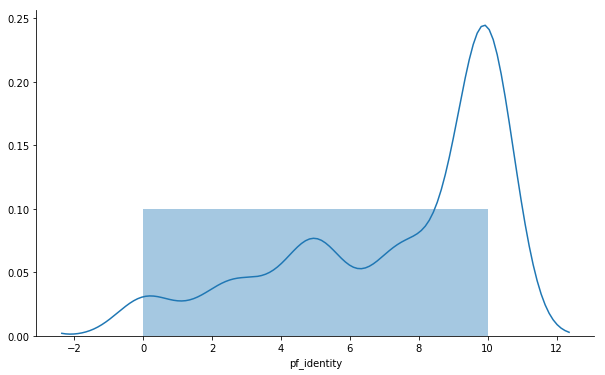

In [12]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'], bins=1)
seaborn.despine()

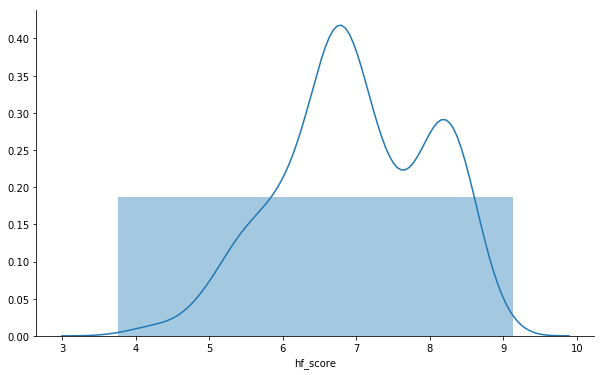

In [13]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'], bins=1)
seaborn.despine()

Adicionalmente realizamos un gráfico de barras para intentar detectar rarezas, para el resto del mundo, en cuanto a las variables que representan las libertades personales y el puntale de las libertades humanas en el mundo:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

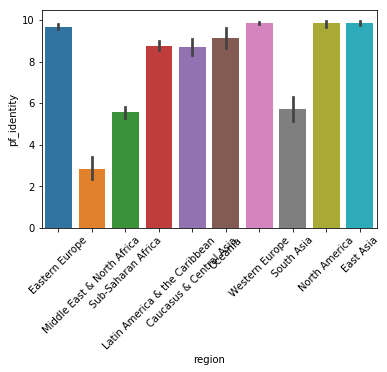

In [27]:
seaborn.barplot(data=idataset, x='region', y='pf_identity')
plt.xticks(rotation=45)

(0, 10)

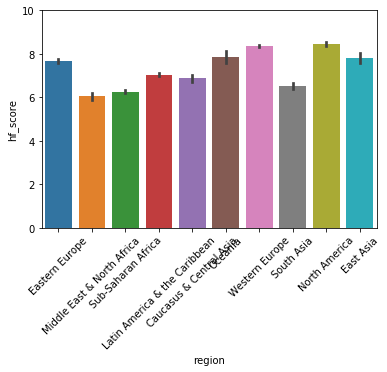

In [33]:
seaborn.barplot(data=idataset, x='region', y='hf_score')
plt.xticks(rotation=45)
plt.ylim(0, 10)

5. Analizamos los posibles outliers solo para las variables principales 'pf_identity', 'hf_score' y 'ef_score' para el mundo, aplicando gráficos boxplot, que nos ayuden a visualizar la existencia de estos valores raros: 

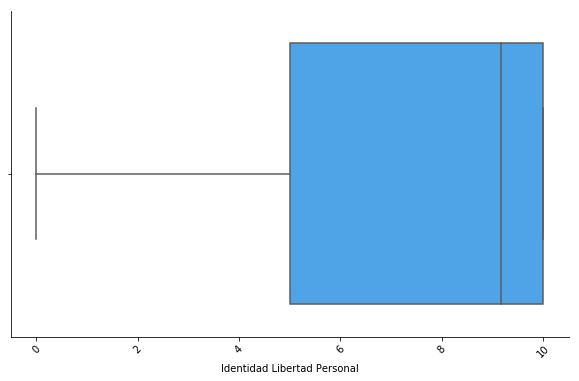

In [30]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=idataset[important_cols],
                x='pf_identity',
                color=BLUE)
plt.xlabel('Identidad Libertad Personal')
plt.xticks(rotation=45)
seaborn.despine()

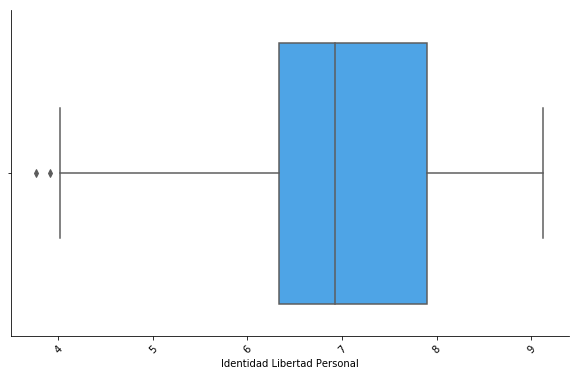

In [31]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=idataset[important_cols],
                x='hf_score',
                color=BLUE)
plt.xlabel('Puntaje de Libertades Humanas')
plt.xticks(rotation=45)
seaborn.despine()

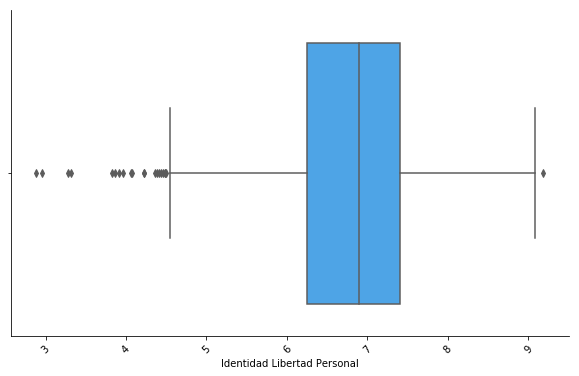

In [32]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=idataset[important_cols],
                x='ef_score',
                color=BLUE)
plt.xlabel('Puntaje de libertades económicas')
plt.xticks(rotation=45)
seaborn.despine()

Las variables de puntajes libertades humanas y economicas presentan outliers o valores raros, que podrimamos interar eliminar dejando sólo los valores que se encuentran en un rango de x (en nuestro caso 2.5) desviaciones estándares de la media:

In [70]:
clean_hf_score = idataset['hf_score']
mask_hf_score = np.abs(clean_hf_score-clean_hf_score.mean()) <= (2.5*clean_hf_score.std())
data_hf_score = clean_hf_score[mask_hf_score]

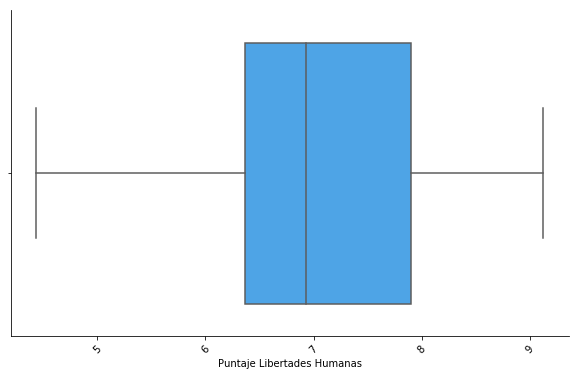

In [71]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=idataset[important_cols],
                x=data_hf_score,
                color=BLUE)
plt.xlabel('Puntaje Libertades Humanas')
plt.xticks(rotation=45)
seaborn.despine()

In [66]:
clean_ef_score = idataset['ef_score']
mask_ef_score = np.abs(clean_ef_score-clean_ef_score.mean()) <= (2.5*clean_ef_score.std())
data_ef_score = clean_ef_score[mask_ef_score]

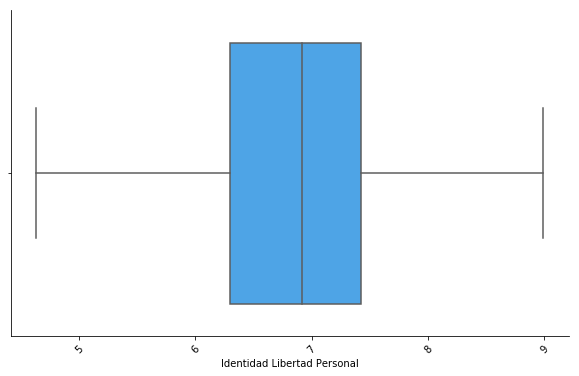

In [67]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=idataset[important_cols],
                x=data_ef_score,
                color=BLUE)
plt.xlabel('Puntale de libertades económicas')
plt.xticks(rotation=45)
seaborn.despine()

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

1. Graficamos la media de las variables 'hf_score' y 'pf_identity' a través de los años para la región:

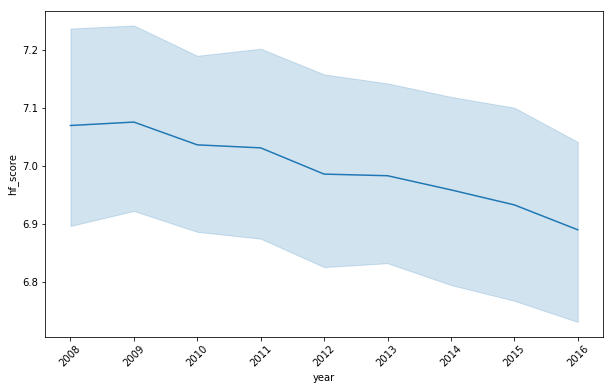

In [40]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=idataset,
                  x='year', y='hf_score', estimator='mean')
plt.xticks(rotation=45);

Los scores de las libertades humanas presentan una tendencia decreciente a lo largo del período analizado, que varían en la velocidad de año en año, con scores que disminuyen apróximadamente entre 7,08 hasta 6,95 al final del período.

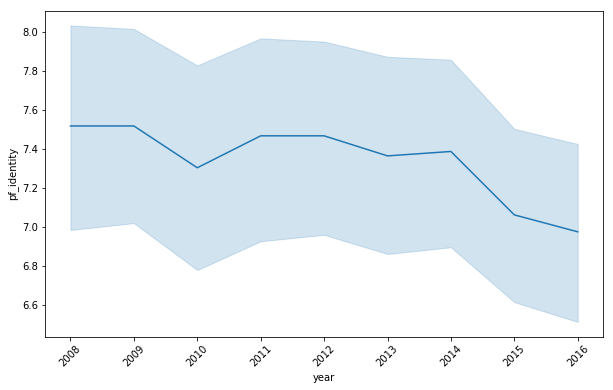

In [41]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=idataset,
                  x='year', y='pf_identity', estimator='mean')
plt.xticks(rotation=45);

Los puntajes de libertades personales presentan una tendencia decreciente por dos períodos consecutivos, luego aparecen de una manera cíclica, incrementos en las libertades de identidad personales, repitiendo el ciclo a menor velocidad con una mayor caída al final del período observado con 7,5 hasta 7,0 al final del período.

2. Seguidamente graficamos la media de las variables 'hf_score' y 'pf_identity' para los diferentes años, teniendo en cuenta las diferentes regiones:

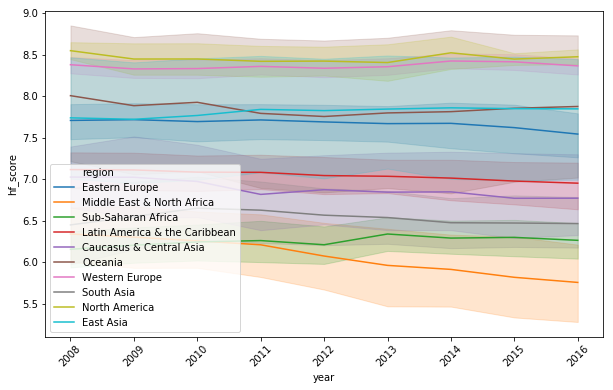

In [42]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=idataset,
                  x='year', y='hf_score', estimator='mean', hue='region')
plt.xticks(rotation=45);

Para los scores de libertades económicas en la región se observa una tendencia más estable con valores medios ubicados en el centro con respecto a las demás regiones; para la regíon América Latina y el Caribe, quizás sería mejor tomar la mediana.

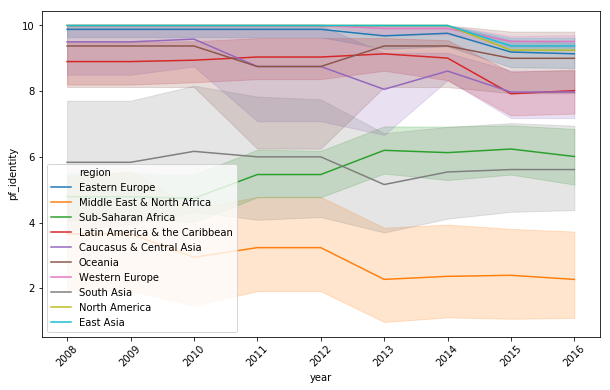

In [43]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=idataset,
                  x='year', y='pf_identity', estimator='mean', hue='region')
plt.xticks(rotation=45);

Las tendencias de los puntajes de libertades de identidad para la región se ubica entre los niveles superiores, en el período analizado, presentando una caida abrupta apartir del año 2014 que se estabiliza en menores valores entre los años 2015-2016. 

Las mismas variables 'pf_identity' y 'hf_score' solo para la región 'Latin America & the Caribbean':

In [14]:
latin_dataset = dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols]

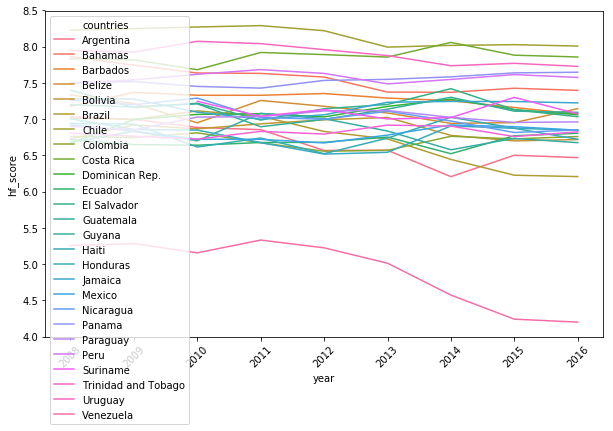

In [75]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset,
                  x='year', y='hf_score', estimator='mean', hue='countries')
plt.xticks(rotation=45);

Los scores de libertades humanas para la región se encuentran aparente y levemente por encima de la media con una estabilidad moderada. Se destaca una separación de Venezuela del resto del grupo que conforman la región. Analizando nuestro país en particular:

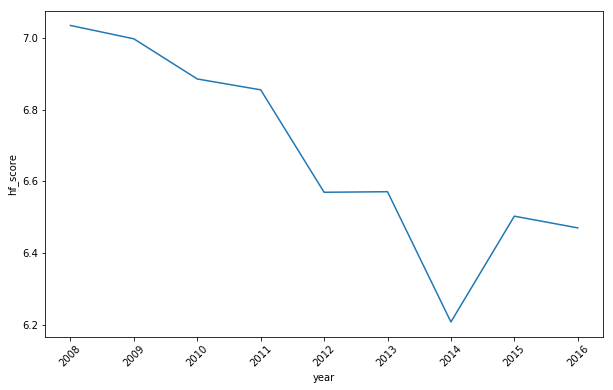

In [94]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']== 'Argentina'],
                  x='year', y='hf_score', estimator='mean')
plt.xticks(rotation=45);

Los scores de libertades humanas para nuestro país se encuentran entre los países que poseen valores medios y aparentemente estables.

En cuanto a las libertades personales para LA observamos que tiene un comportamiento muy dispar que se traduce en un gráfico poco legíble para la región:

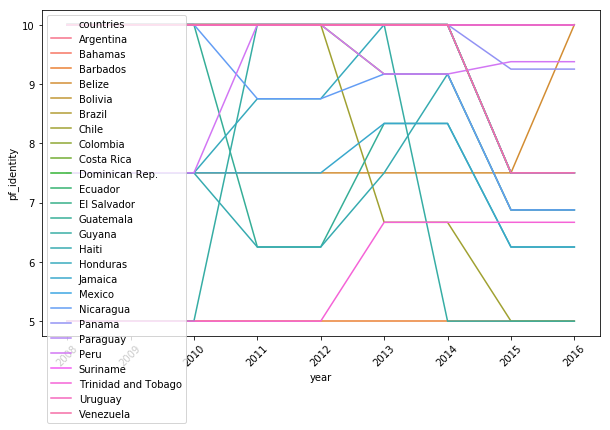

In [47]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset,
                  x='year', y='pf_identity', estimator='mean', hue='countries')
plt.xticks(rotation=45);

3. Observando algunos países como Venezuela, República Dominicana, Bolivia y Brasil, podemos comprender la tendencia decreciente de la región:

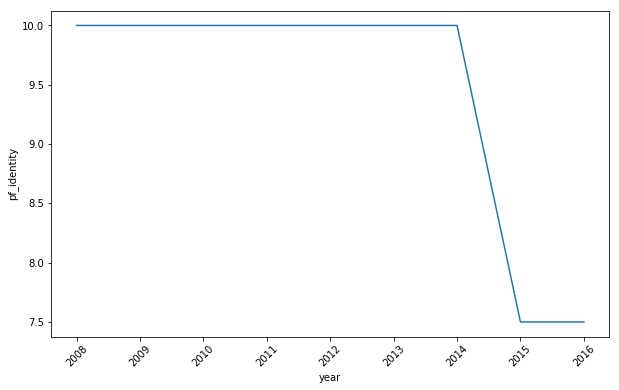

In [49]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Venezuela'][important_cols],
                  x='year', y='pf_identity', estimator='mean')
plt.xticks(rotation=45);

Se observa con claridad la caída abrupta del puntaje de libertades de identidad para Venzuela entre los años 2014-2015

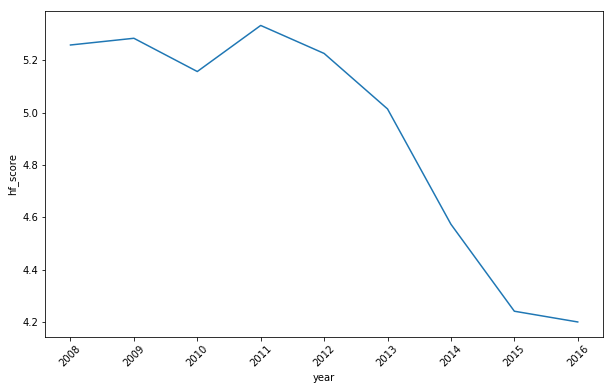

In [50]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Venezuela'][important_cols],
                  x='year', y='hf_score', estimator='mean')
plt.xticks(rotation=45);

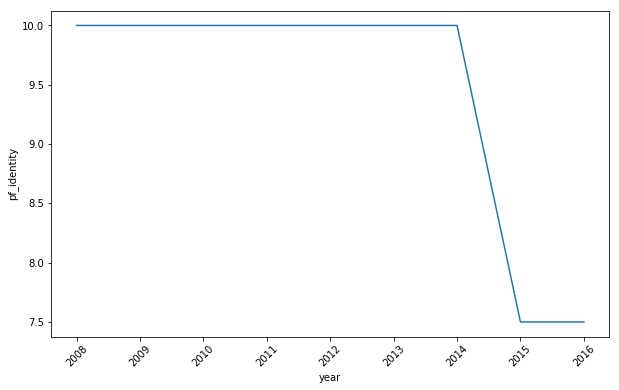

In [51]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Dominican Rep.'][important_cols],
                  x='year', y='pf_identity', estimator='mean')
plt.xticks(rotation=45);

Los puntajes para Rep. Dominicana muestran la misma tendencia que para Venezuela.

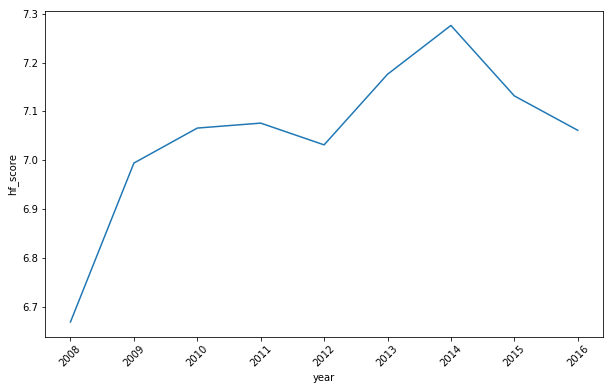

In [52]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Dominican Rep.'][important_cols],
                  x='year', y='hf_score', estimator='mean')
plt.xticks(rotation=45);

Con respecto al score para libertades humanas de Rep. Dominicana el comportamiento es creciente entre el período hasta el año 2014, tendencia que lo incorpora como uno de los países con mayor score en el período.

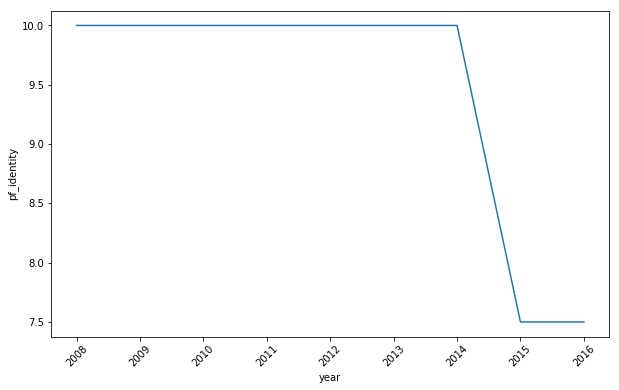

In [56]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Bolivia'][important_cols],
                  x='year', y='pf_identity', estimator='mean')
plt.xticks(rotation=45);

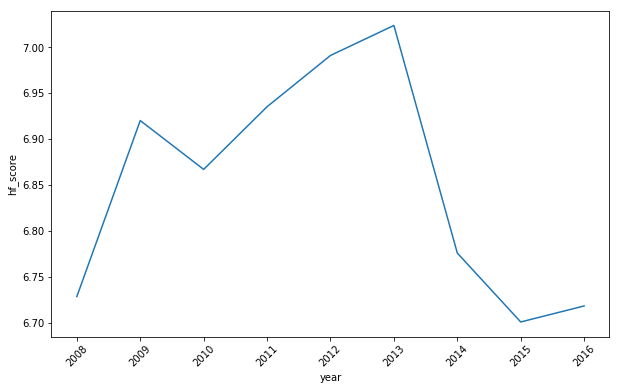

In [54]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Bolivia'][important_cols],
                  x='year', y='hf_score', estimator='mean')
plt.xticks(rotation=45);

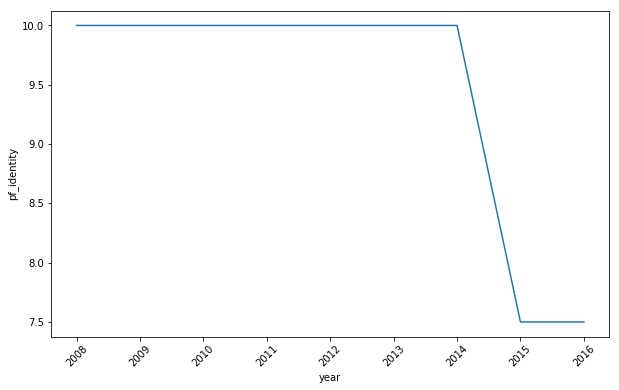

In [57]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Brazil'][important_cols],
                  x='year', y='pf_identity', estimator='mean')
plt.xticks(rotation=45);

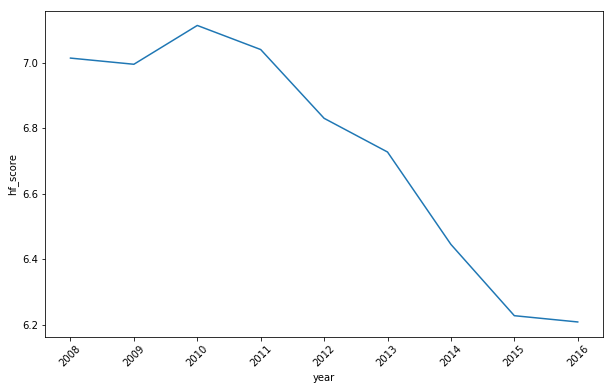

In [58]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=latin_dataset[latin_dataset['countries']=='Brazil'][important_cols],
                  x='year', y='hf_score', estimator='mean')
plt.xticks(rotation=45);

OBSERVACIÓN, los scores de la libertad humana son los que otorgan los lugares que ocuparan los países dentro de America Latina y el Caribe, determinando las posiciones en las que se ubican en el mediano plazo, las tendencias grupales en el tiempo y quiebres estructurales fuertes están determinadas con mayor preponderacia por puntajes de libertad de indentidades.

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. [opcional] Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

1. Graficamos en un mismo histograma la distribución de la variable 'pf_identity' para el mundo y en Latinoamérica y el Carible:

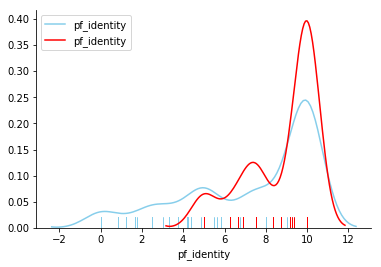

In [33]:
seaborn.distplot( idataset['pf_identity'] , color="skyblue", label="pf_identity", bins=1, hist=False, rug=True)
seaborn.distplot( latin_idataset['pf_identity'], color="red", label="pf_identity", bins=1, hist=False, rug=True)
seaborn.despine()

Los datos bajo la curva celeste representan la distribución de los datos para la libertad de identidad personal que corresponde al mundo en su totalidad. La curva roja representa la distribución de los datos únicamente para la Región de Latino América y el Caribe; se observa en general falta de normalidad en la distribución de los datos. En principio se distribuyen como una binomial negativa, con superdispersión. La curva que representa los datos pertenecientes a LA presentan puntiagudez, lo que puede indicar datos faltantes, que aparentemente deberían ser sacados del dataset.

Graficamos en un mismo histograma la distribución de la variable 'hf_score' para el mundo y en Latinoamérica y el Carible:

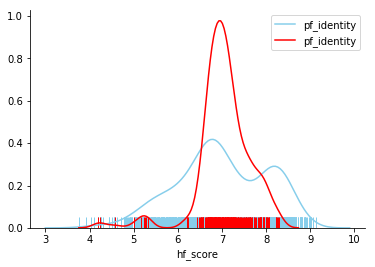

In [34]:
seaborn.distplot( idataset['hf_score'] , color="skyblue", label="pf_identity", bins=1, hist=False, rug=True)
seaborn.distplot( latin_idataset['hf_score'], color="red", label="pf_identity", bins=1, hist=False, rug=True)
seaborn.despine()

Las curvas presentan formas que se adecúan a la distribución normal, sin embargo la Kurtosis de la curva roja existe ser explorada.

2 Realizamos una prueba de Kolmogorov-Smirnof para todo el mundo con el objetivo de comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior:

##### La hipótesis "Las gráficas pertenecen a una distribución Normal"

In [15]:
stats.kstest(idataset['pf_identity']>=0, 'norm')

KstestResult(statistic=0.7864750615692288, pvalue=0.0)

In [16]:
stats.kstest(idataset['hf_score']>=0, 'norm')

KstestResult(statistic=0.7864750615692288, pvalue=0.0)

En ambos casos al ser pvalue=0.0 no podemos confirmar la hipótesis, la cual queda rechazada.

3. Realizamos un gráfico QQ sobre las variables 'pf_identity' y 'hf_score' a nivel global para observar nuevamente sus distribuciones:

In [26]:
identity = idataset['pf_identity'].dropna()

In [27]:
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit([identity])
loc, scale

(7.334179970968069, 3.1583260555019637)

Ahora graficamos una distribución normal con estos parámetros para comparar con nuestra variable 'pf_identity':

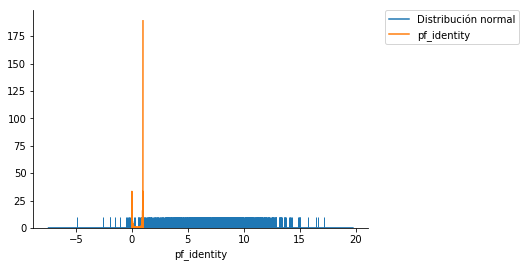

In [28]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal', bins=1, hist=False, rug=True)
seaborn.distplot(idataset['pf_identity'] > 0, label='pf_identity', bins=1, hist=False, rug=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

In [29]:
percs = np.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = np.percentile(idataset['pf_identity'] > 0, percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(idataset['pf_identity'] > 0)), percs)

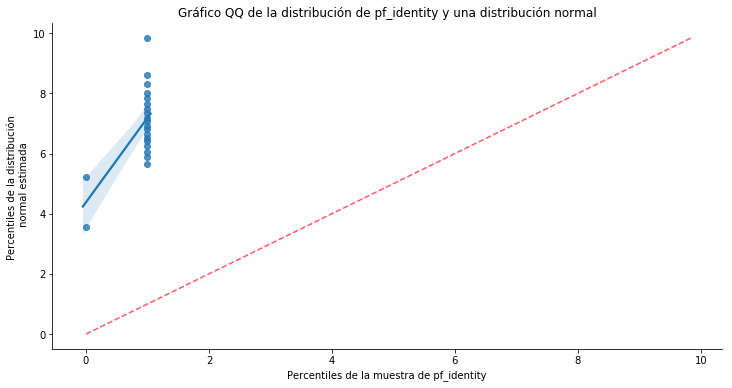

In [35]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')

x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

In [30]:
hfscore = idataset['hf_score'].dropna()

In [31]:
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit([hfscore])
loc, scale

(6.993443755514514, 1.0254388834900923)

Ahora graficamos una distribución normal con estos parámetros para comparar con nuestra variable 'hf_score':

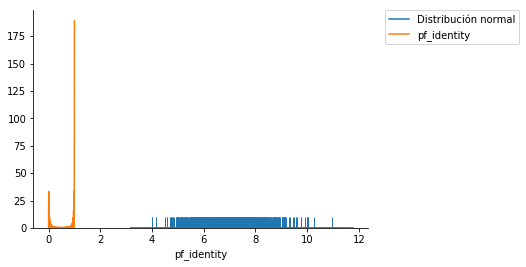

In [32]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal', bins=1, hist=False, rug=True)
seaborn.distplot(idataset['pf_identity'] > 0, label='pf_identity', bins=1, hist=False, rug=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

In [33]:
percs = np.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = np.percentile(idataset['hf_score'] > 0, percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(idataset['hf_score'] > 0)), percs)

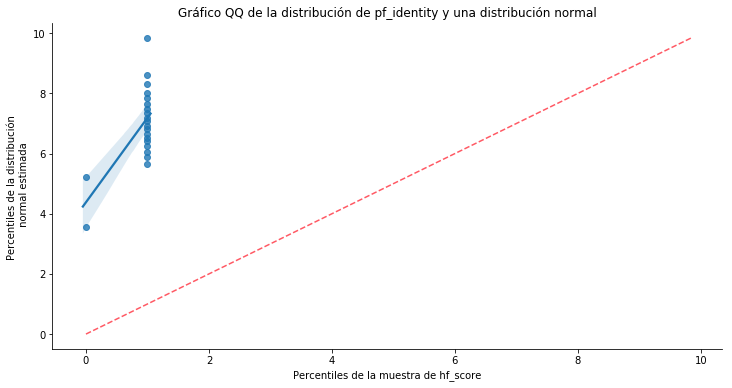

In [34]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')

x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

(Bajo el supuesto que los gráficos estan correctos en su cálculo)
Aparentemente la distribución en ambas variables no es la misma que la distribución de comparación ya que no se obtiene una línea recta, especialmente cerca de su centro. Habria diferencias sustanciales de linealidad, existiendo una agrupación de datos en los valores comprendidos entre 6 y 8.

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


1. Generamos un gráfico pairplot de las variables 'pf_indentity', 'hf_score' y 'ef_score':

In [36]:
identity_and_score = ['pf_identity', 'hf_score', 'ef_score']
plot_data = idataset[identity_and_score]

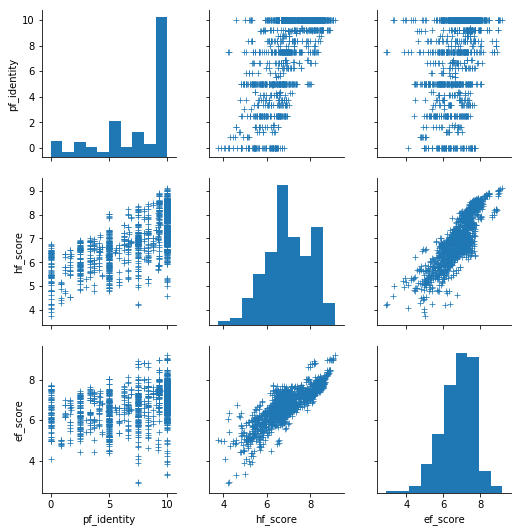

In [37]:
seaborn.pairplot(
    data=plot_data,
    vars=['pf_identity', 'hf_score', 'ef_score'], 
    markers='+')

De acuerdo al gráfico parece haber una relación lineal positiva entre las variables ef_score y hf_score.

En cuanto a la variable referida a las libertades de identidad personal este tipo de gráfico no es adecuado por tratarse de una variable discreta.

2. Pasamos a graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score.

In [30]:
identity_and_hf_score = ['pf_identity', 'hf_score']
jointplot_hf_data = idataset[identity_and_hf_score]

C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x432 with 0 Axes>

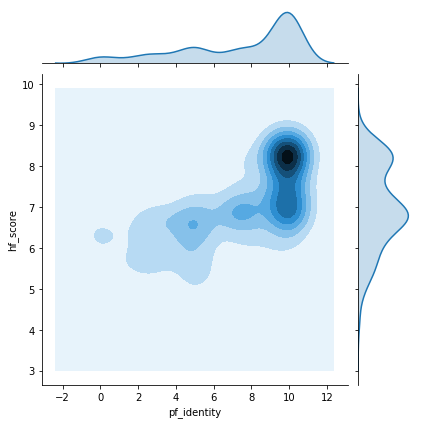

In [13]:
plt.figure(figsize=(10,6))
seaborn.jointplot(data=jointplot_hf_data,
                  x='pf_identity', y='hf_score', kind='kde')

In [14]:
identity_and_ef_score = ['pf_identity', 'ef_score']
jointplot_ef_data = idataset[identity_and_ef_score]

<Figure size 720x432 with 0 Axes>

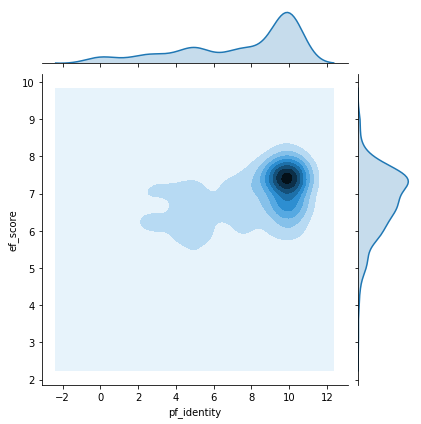

In [110]:
plt.figure(figsize=(10,6))
seaborn.jointplot(data=jointplot_ef_data,
                  x='pf_identity', y='ef_score', kind='kde')

No podemos asegurar que la concentración de valores conjuntos no sea sólo producto de los valores más frecuentes de cada distribución independiente, aunque hace pensar que si.

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

In [38]:
from scipy import stats
stats.kstest(dataset['pf_identity'].dropna(), 'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [39]:
stats.kstest(dataset['hf_score'].dropna(), 'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

In [40]:
stats.kstest(dataset['ef_score'].dropna(), 'norm')

KstestResult(statistic=0.9980295857569237, pvalue=0.0)

Como pvalue es igual a 0 para las 3 variables no podemos asegurar que sigan una distribucion Normal, 
entonces utilizamos el coeficiente de spearman. Al coeficiente de Tal de Kendall no lo podemos utilizar tampoco ya que este se usa con variables cualitativas ordinales

In [41]:
dataset[['pf_identity', 'hf_score']].corr(method ='spearman')

,pf_identity,hf_score
pf_identity,1.000000,0.686109
hf_score,0.686109,1.000000


In [42]:
dataset[['pf_identity', 'ef_score']].corr(method ='spearman')

,pf_identity,ef_score
pf_identity,1.000000,0.426993
ef_score,0.426993,1.000000


En base a los resultados se podria determinar que existe una correlacion lineal mas marcada entre la variable pf_identity y hf_score.

------------------------------------------------------------------------------------------------------------------

En lineas generales podemos decir que las libertades humanas y de identidad personal parecen tener un comportamiento decreciente desde el 2008 al 2016 a nivel mundial; en algunas regiones como Asia del Sur, Medio Oriente y Latinoamerica y el Caribe tienen comportamientos un poco más marcados, que seguramente se deban a diferentes tipo de factores socio-económicos y culturales.
Pudiendo decir que hay una relación importante entre las libertades económicas y humanas en general.

> Ser libre no es sólo deshacerse de las cadenas de uno, sino vivir de una forma que respete y mejore la libertad de los demás -Nelson Mandela

------------------------------------------------------------------------------------------------------------------